*Load datasets based from all csv's*

In [22]:
using CSV
using DataFrames
using Plots
using Flux
using Flux: throttle
using StatsPlots

In [38]:
# load all Listings in to the DataFrame's
cities = ["Amsterdam","Barcelona","CapeTown","Florence","HongKong","Montreal","NewZealand","Stockholm"]
city_center_locations = Dict(
    "Amsterdam" => (52.37403, 4.88969),
    "Barcelona" => (41.38506, 2.17340),
    "CapeTown" => (-33.92487, 18.42406),
    "Florence" => (43.76956, 11.25581),
    "HongKong" => (22.39643, 114.10950),
    "Montreal" => (45.49724, -73.61036),
    "NewZealand" => (-36.84846, 174.76333),
    "Stockholm" => (59.32932, 18.06858)
)

# create a container for the DataFrames with tuples of (city, df)
city_dfs = Dict()
for city in cities
    current_df = CSV.read("../datasets/" * city * "/listings.csv",DataFrame)
    # push the current city and its DataFrame to the container
    city_dfs[city] = current_df
end
    

In [28]:
function get_distance_from_city_center(city_center,x,y)
    return sqrt((x - city_center[1])^2 + (y - city_center[2])^2)
end

get_distance_from_city_center (generic function with 4 methods)

In [52]:
# create a new column with the distance from the city center
for city in cities
    city_dfs[city].distance_from_center = get_distance_from_city_center.(city_center_locations[city],city_dfs[city].latitude,city_dfs[city].longitude)
end

DimensionMismatch: [91mDimensionMismatch("arrays could not be broadcast to a common size; got a dimension with lengths 2 and 6893")[39m

In [27]:
regX = df.distance_from_city_center
regY = clamp.(df.price,0,2000)
X = hcat(ones(length(regX)),regX)
Y = regY
intercept,slope = inv(X'*X)*(X'*Y)

Plots.scatter(df.distance_from_city_center,clamp.(df.price,0,1000),legend=false,markersize=1.0,label="data")
plot!((x) -> intercept + slope * x, 0, 0.2, label="fit_exact",linewidth=3,color=:red)

UndefVarError: [91mUndefVarError: df not defined[39m

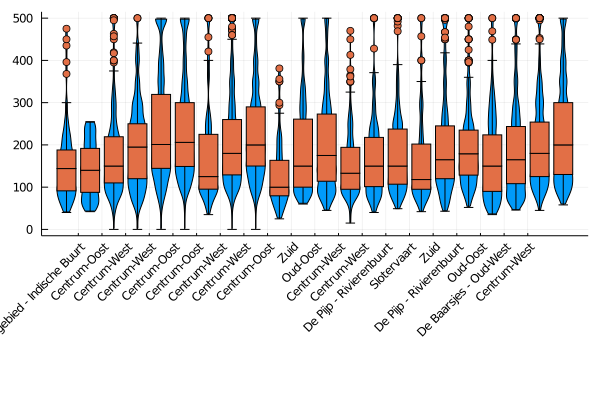

In [15]:
y = rand(100, 4)
violin(df.neighbourhood, clamp.(df.price,0,500), legend=false,figsize=(1000,1000),xticks=(1:20, df.neighbourhood), xrotation=45)
boxplot!(df.neighbourhood, clamp.(df.price,0,500), legend=false,figsize=(1000,1000),xticks=(1:20, df.neighbourhood), xrotation=45)

*Select the best listings based on the price / distance from city centre combo*

*Visualize pricing based on the season to book*

*Compare multiple Cities on price / distance ration*